In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
#Load the data
training_data = pd.read_csv('C:/Users/clifford.osei/Documents/Fantasy-Premier-League/Fantasy-Premier-League/Data-Collection/Datasets/raw_data_combined.csv') 

In [3]:
historical_data = training_data.copy()
historical_data

,Player Name,Team,Position,Pts,GS,A,CS,B,BPS,PPG,MP,Cost,TSB,GC,OG,PS,PM,Season
0,Sánchez,ARS,MID,264,24,11,13,32,834,6.9,3217,£11.7,29.7%,41,0,0,1,2016
1,Alli,TOT,MID,225,18,11,17,17,679,6.1,3036,£9.1,32.3%,22,0,0,0,2016
2,Hazard,CHE,MID,224,16,9,17,33,869,6.2,2985,£10.5,30.6%,29,0,0,1,2016
3,Kane,TOT,FWD,224,29,7,14,33,920,7.5,2523,£11.9,23.3%,19,0,0,1,2016
4,Lukaku,EVE,FWD,221,25,6,13,33,824,6.0,3266,£10.1,32.2%,42,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,Barrington,BHA,MID,0,0,0,0,0,0,0.0,0,£4.5,0.0%,0,0,0,0,2023
4451,Pitaluga,LIV,GKP,0,0,0,0,0,0,0.0,0,£4,0.0%,0,0,0,0,2023
4452,Bradley,LIV,DEF,0,0,0,0,0,0,0.0,0,£4,0.0%,0,0,0,0,2023
4453,Castledine,CHE,MID,0,0,0,0,0,0,0.0,0,£4.5,0.0%,0,0,0,0,2023


In [4]:
#historical_data.PPG.dtype

Preprocessing of Data

In [5]:
# Convert 'Season' column to datetime type with a fixed month and day (Assuming 1st August is the start of the season)
desired_month = 8 
desired_day = 1 

historical_data['Season'] = pd.to_datetime(historical_data['Season'], format='%Y') + pd.DateOffset(months=desired_month-1, days=desired_day-1)

In [6]:
# Rename and convert the 'Cost' column
historical_data.rename(columns={'Cost': 'Cost(£M)'}, inplace=True)
historical_data['Cost(£M)'] = historical_data['Cost(£M)'].str.replace('£', '')
historical_data['Cost(£M)'] = historical_data['Cost(£M)'].astype(float)

In [7]:
# Rename and convert the 'TSB' column
historical_data.rename(columns={'TSB': 'TSB(%)'}, inplace=True)
historical_data['TSB(%)'] = historical_data['TSB(%)'].str.replace('%', '')
historical_data['TSB(%)'] = historical_data['TSB(%)'].astype(float)

In [8]:
historical_data

,Player Name,Team,Position,Pts,GS,A,CS,B,BPS,PPG,MP,Cost(£M),TSB(%),GC,OG,PS,PM,Season
0,Sánchez,ARS,MID,264,24,11,13,32,834,6.9,3217,11.7,29.7,41,0,0,1,2016-08-01
1,Alli,TOT,MID,225,18,11,17,17,679,6.1,3036,9.1,32.3,22,0,0,0,2016-08-01
2,Hazard,CHE,MID,224,16,9,17,33,869,6.2,2985,10.5,30.6,29,0,0,1,2016-08-01
3,Kane,TOT,FWD,224,29,7,14,33,920,7.5,2523,11.9,23.3,19,0,0,1,2016-08-01
4,Lukaku,EVE,FWD,221,25,6,13,33,824,6.0,3266,10.1,32.2,42,0,0,0,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,Barrington,BHA,MID,0,0,0,0,0,0,0.0,0,4.5,0.0,0,0,0,0,2023-08-01
4451,Pitaluga,LIV,GKP,0,0,0,0,0,0,0.0,0,4.0,0.0,0,0,0,0,2023-08-01
4452,Bradley,LIV,DEF,0,0,0,0,0,0,0.0,0,4.0,0.0,0,0,0,0,2023-08-01
4453,Castledine,CHE,MID,0,0,0,0,0,0,0.0,0,4.5,0.0,0,0,0,0,2023-08-01


In [9]:
historical_data.Season.dtype

dtype('<M8[ns]')

Summary stats for numerical variables

In [10]:
#Checking if data has null values
historical_data.isnull().sum()

Player Name    0
Team           0
Position       0
Pts            0
GS             0
A              0
CS             0
B              0
BPS            0
PPG            0
MP             0
Cost(£M)       0
TSB(%)         0
GC             0
OG             0
PS             0
PM             0
Season         0
dtype: int64

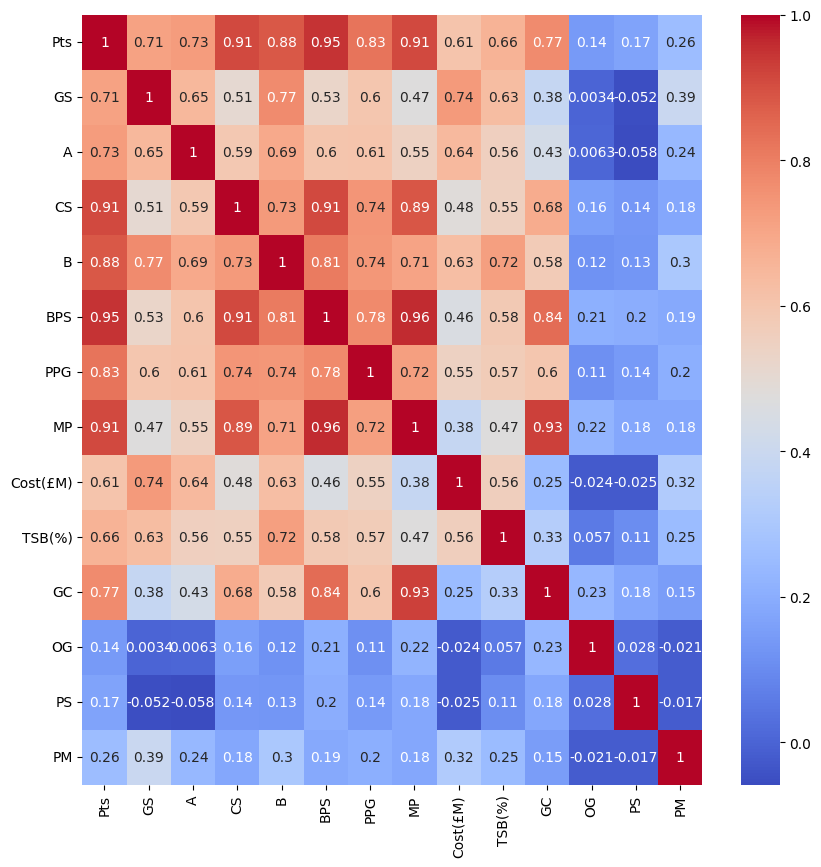

In [11]:
plt.figure(figsize=(10,10))
numeric_data = historical_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

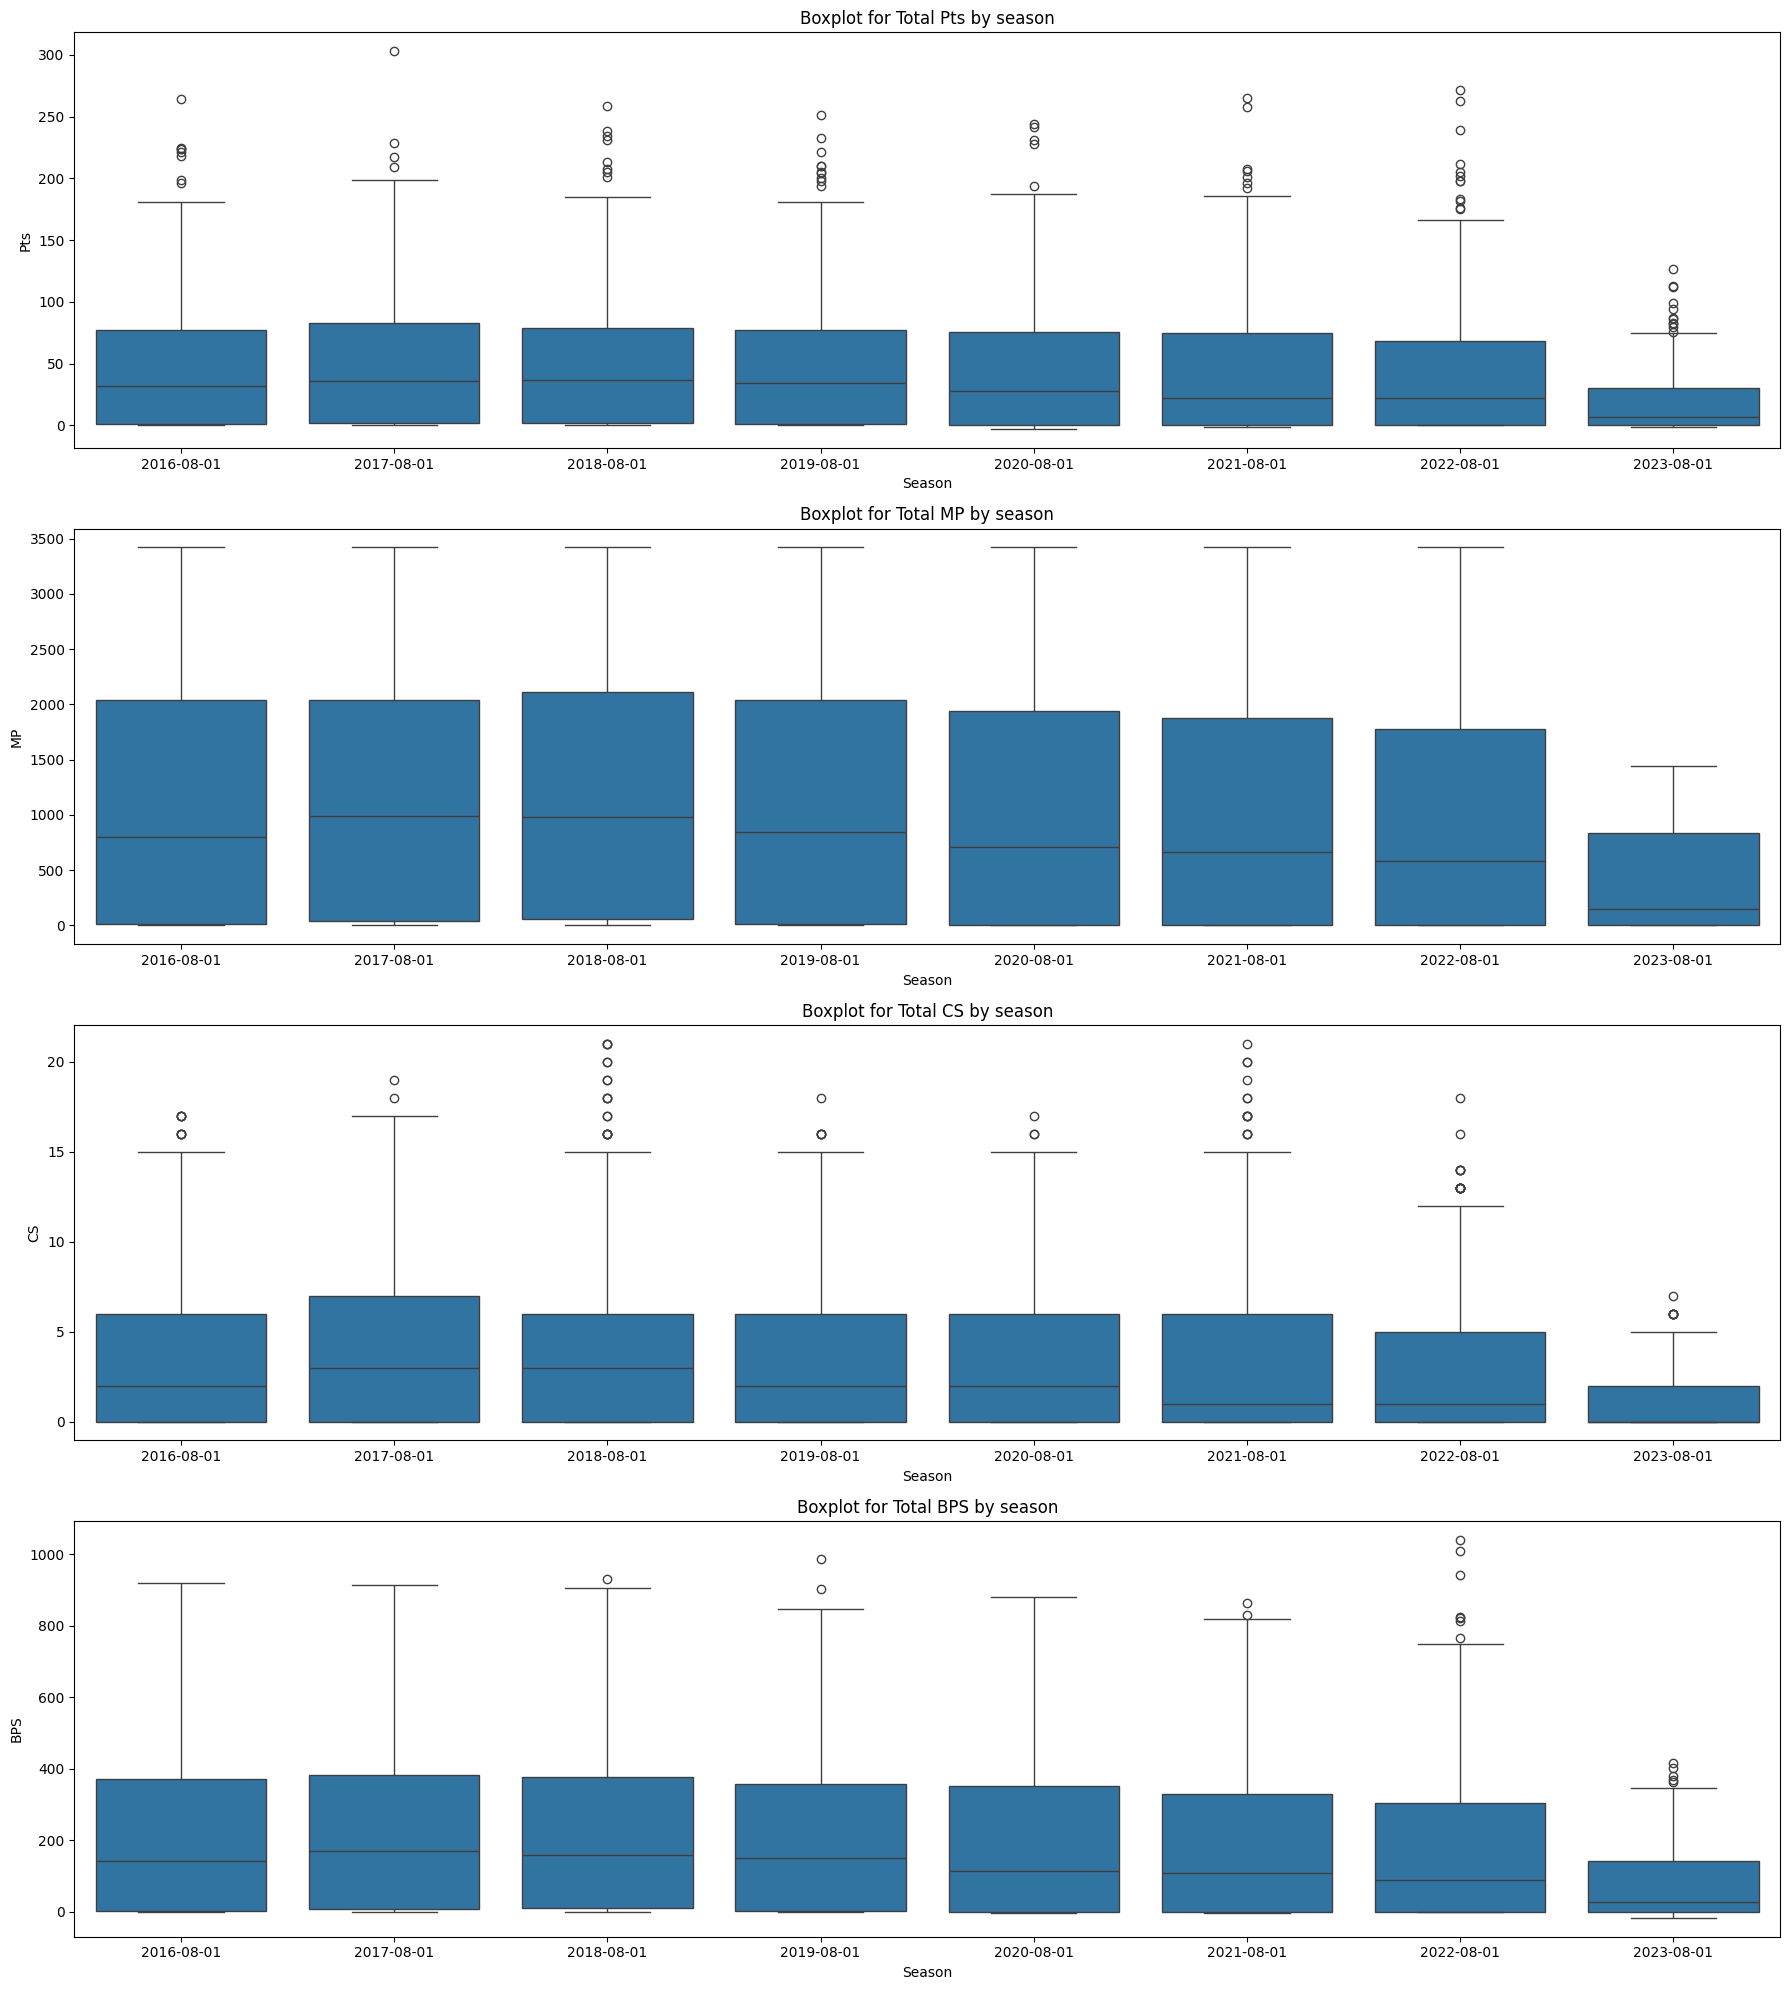

In [19]:
#Top correlated variables 
variables_to_plot = ['Pts', 'MP', 'CS', 'BPS'] 

#Subplots set-up
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(18, 5 * len(variables_to_plot)))

# Plot boxplots for each variable
for i, variable in enumerate(variables_to_plot):
    sns.boxplot(x=historical_data['Season'], y=historical_data[variable], ax=axes[i])
    axes[i].set_title(f'Boxplot for Total {variable} by season')

plt.tight_layout()
plt.show()

Looking for a trend if maximum points per season has increased over time

In [13]:
#Indexing datetime column
# historical_data.set_index('Season', inplace=True)

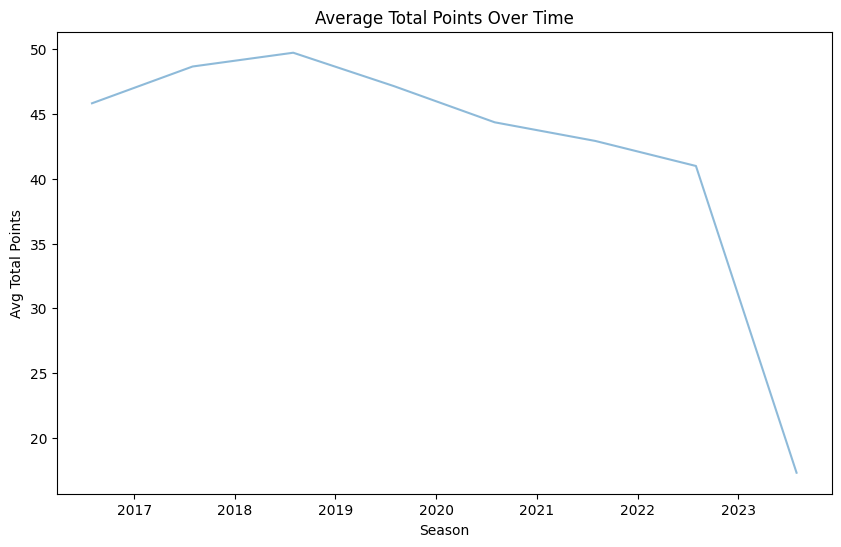

In [14]:
# Group by 'Season' and calculate the maximum points for each season
avg_points_per_season = historical_data.groupby('Season')['Pts'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_points_per_season.index, avg_points_per_season, alpha=0.5)
plt.title('Average Total Points Over Time')
plt.xlabel('Season')
plt.ylabel('Avg Total Points')
plt.show()

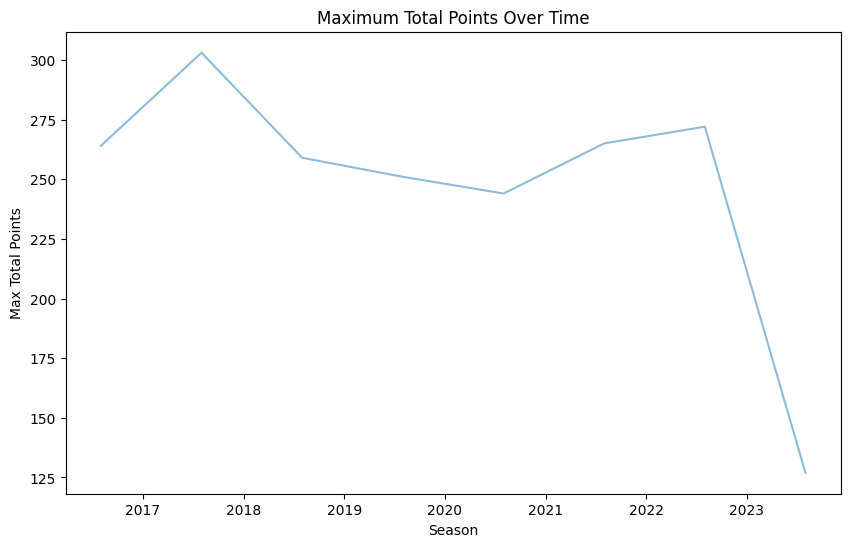

In [15]:
# Group by 'Season' and calculate the maximum points for each season
max_points_per_season = historical_data.groupby('Season')['Pts'].max()

plt.figure(figsize=(10, 6))
plt.plot(max_points_per_season.index, max_points_per_season, alpha=0.5)
plt.title('Maximum Total Points Over Time')
plt.xlabel('Season')
plt.ylabel('Max Total Points')
plt.show()

In [ ]:
# Save the pre-processed data to a new CSV file
historical_data.to_csv('timeseries_data.csv', index=False)